# Differential Equations

This notebook will explain how to use linear algebra and discrete approximation to solve differential equations. This notebook follows some of the developments of these ideas in TAK. (See Example 8 from &sect; 4.3 for example.)

In [1]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv
from scipy import linalg

## Spring problem

We will study a classic example, which hopefully you have seen before in a differential equations class.

In the spring problem, we let a spring hang from the ceiling. Then we attach an object to the bottom of the spring. We pull down or lift the object and give it some initial velocity and let go. We want to know the position $u$ of the object at time $t$.

We use the variable $u$ to denote the vertical displacement of the object measured relative to position of the object at equilibrium. Thus $u(t)= 0$ for all $t$ is one solution. We also parameterize so that larger values if $u$ indicate that the object is lower (equivalently, the spring is longer), and smaller values indicate that the object is higher (and the spring is shorter).

The differential equation satisfied by the spring is of the form 
$$m u'' + \gamma u' + k u = F(t),$$
where $m$ is the mass of the object, $\gamma$ is the damping coefficient, $k$ is the spring constant, and $F(t)$ is the total of any external forces acting on the spring. In order to have a unique solution, we also specify:
* The initial displacement $u(0)=a$.
* The initial velocity of the mass $u'(0)=b$.

## Discretization

#### Set up

<p style="margin-top:2em; text-indent: 2em;">
Let's say that we want to approximate the solution on the interval $[0,T]$. By discretization, we mean we want to approximate the solution using finitely many points. Suppose we want to know the value of $u(t)$ for
$$t \in \left\{0, \frac{T}{N}, \frac{2T}{N}, \ldots, \frac{(N-1)T}{N}, T\right\}.$$
Let $t_j = \frac{jT}{N}$ for $j \in \{0, \ldots, N\}$ and $h=\frac{T}{N}$. Then 
$$t_{j+1}=t_j + h.$$
We can organize the $t_j$ values in a vector
    $${\mathbf t} = \big(t_0, t_1, \ldots, t_{N}\big).$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
We are looking for the values $u_j = u(t_j)$. We will eventually store them as a vector:
    $${\mathbf u} = (u_0, u_1, \ldots, u_N).$$
</p>

#### Initial Values
<p style="margin-top:2em; text-indent: 2em;">We get equations from the initial values for the differential equation. Since $u_0 = u(0)$, we can write the initial displacement equation as:
    $$(0) \qquad u_0 = a. \qquad$$
We also know $u'(0)=b$. Using the discrete approximation of the derivative, we have 
    $$u'(0) \approx \frac{u(h)-u(0)}{h} = \frac{u_1 - u_0}{h}.$$
So, we will approximate the condition $u'(0)=b$ by 
    $$(1) \qquad \frac{-1}{h} u_0 + \frac{1}{h} u_1 = b. \qquad$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
    We can combine the two equations above in a matrix-vector equation:
    $$\left[\begin{array}{rrrrr}
    1 & 0 & 0 & 0 & \ldots \\
    \frac{-1}{h} & \frac{1}{h} & 0 & 0 & \ldots \\
    \end{array}\right]\left[\begin{array}{r} u_0 \\ u_1 \\ \vdots \\ u_N\end{array}\right] = 
    \left[\begin{array}{r} a \\ b \end{array}\right].$$

#### The differential equation
<p style="margin-top:2em; text-indent: 2em;">
    We currently have two linear equations from initial values (labeled (1) and (2) above) and $N+1$ unknowns. We need to look for $N-1$ more equations so that we have the same number of equations and unknowns. We will find one equation for each time $t_j$ with $j \in \{1, \ldots, N-1\}$. The advantage of this is that we have access to $u_{j-1} = u(t_j-h)$, $u_{j}=u(t_j)$ and $u_{j+1}=u(t_{j}+h).$
</p>

<p style="margin-top:2em; text-indent: 2em;">
    Our differential equation considered at time $t_j$ is given by 
    $$m u''(t_j) + \gamma u'(t_j) + k u(t_j) = F(t_j).$$
    We have $u_j=u(t_j)$. We want to replace $u'(t_j)$ and $u''(t_j)$ with linear combinations of the entries $u_\ast$.
</p>

<p style="margin-top:2em; text-indent: 2em;">
    We can estimate $u'(t_j)$ using the two point estimate
    $$u'(t_j) \approx \frac{u(t_j+h)-u(t_j - h)}{2h} = \frac{u_{j+1} - u_{j-1}}{2h}.$$

<p style="margin-top:2em; text-indent: 2em;">
    Similarly, we can estimate $u''(t_j)$ by 
    $$u''(t_j)=\frac{u(t_j+h) - 2 u(t_j) + u(t_j-h)}{h^2}=\frac{u_{j+1} - 2 u_j + u_{j-1}}{h^2}.$$
</p>

<p style="margin-top:2em; text-indent: 2em;">
Substituting these approximations into our differential equation $m u''(t_j) + \gamma u'(t_j) + k u(t_j) = F(t_j)$ gives us the linear equation:
    $$\frac{mu_{j+1} - 2 mu_j + mu_{j-1}}{h^2} + \frac{\gamma u_{j+1} - \gamma u_{j-1}}{2h} + k u_j = F(t_j).$$
It makes sense to combine like terms. This yields the equation:
    $$\left(\frac{m}{h^2}-\frac{\gamma}{2h}\right)u_{j-1} +
    \left(k-\frac{2m}{h^2}\right)u_j +
    \left(\frac{m}{h^2}+\frac{\gamma}{2h}\right)u_{j+1} = F(t_j).$$
    Here we are getting one equation for each $j=1, \ldots, N-1$ as noted above. Combining these as a matrix equation, we have:
    $$\begin{bmatrix}
\frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & \dots & 0 \\
0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\ 
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\ 
0 & \dots & \dots & 0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h}
\end{bmatrix}.
\begin{bmatrix}
u_0 \\
u_1 \\
u_2 \\
u_3 \\
\vdots \\
u_N \\
\end{bmatrix}
=
\begin{bmatrix}
F(t_1) \\
F(t_2) \\
F(t_3) \\
\vdots \\
F(t_{N-1})
\end{bmatrix}
$$

#### The linear system

Combining the matrix equations from the initial conditions and the differential equation, we get the following:

$$\begin{bmatrix}
1 & 0 & \ldots & \ldots & \ldots & \dots & 0 \\
\frac{-1}{h} & \frac{1}{h} & 0 & \ldots & \ldots & \ldots & 0 \\
\frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & \dots & 0 \\
0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h} & 0 & \ldots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\ 
\vdots &  & \ddots & \ddots & \ddots & \ddots & 0 \\ 
0 & \dots & \dots & 0 & \frac{m}{h^2}-\frac{\gamma}{2h} & k-\frac{2m}{h^2} & \frac{m}{h^2}+\frac{\gamma}{2h}
\end{bmatrix}.
\begin{bmatrix}
u_0 \\
u_1 \\
u_2 \\
u_3 \\
u_4 \\
\vdots \\
\vdots \\
u_N \\
\end{bmatrix}
=
\begin{bmatrix}
a\\
b\\
F(t_1) \\
F(t_2) \\
F(t_3) \\
\vdots \\
\vdots \\
F(t_{N-1})
\end{bmatrix}
$$

#### Solving the system.

We can solve the system by forward substitution. Associated to the first line we have
$$u_0 = a.$$

The second line is 
$\frac{-1}{h} u_0 + \frac{1}{h} u_1 = b.$
Solving, we see that
$$u_1 = h\big(b + \frac{u_0}{h}).$$

Then the generic line in the matrix is given by 
$$\left(\frac{m}{h^2}-\frac{\gamma}{2h}\right)u_{j-1} +
    \left(k-\frac{2m}{h^2}\right)u_j +
    \left(\frac{m}{h^2}+\frac{\gamma}{2h}\right)u_{j+1} = F(t_j).$$

We'll assume we already know $u_{j-1}$ and $u_j$. Then we have
$$u_{j+1} = \left(F(t_j) - \left(\frac{m}{h^2}-\frac{\gamma}{2h}\right)u_{j-1} -
    \left(k-\frac{2m}{h^2}\right)u_j\right)\Big/\left(\frac{m}{h^2}+\frac{\gamma}{2h}\right).$$

## Implementation

We need to pass our function a number of parameters:
* The mass `m`, the damping constant `gamma`, and the spring constant `k`.
* The forcing function `F`, which will be a Python function ${\mathbb R} \to {\mathbb R}$.
* The initial position `a` and velocity `b`.
* The time $T$ determining the interval $[0,T]$.
* The number $N$, so that we use $N+1$ points equally spaced in $[0,T]$.

Our function will return a numpy array `u` with entries `u[0]` up to `u[N]`. The value of `u[j]` will store the computed value of $u_j = u(t_j)$.

The following function implements this:

In [9]:
def spring_solve(m, gamma, k, F, a, b, T, N):
    h = T/N
    # The t values we use:
    t = np.linspace(0, T, N+1)
    # This will store the u values we compute.
    u = np.zeros(N+1)
    u[0] = a
    u[1] = h * (b + u[0]/h)
    for j in range(1,N):
        u[j+1] = ( F(t[j]) - (m/h**2-gamma/(2*h))*u[j-1] - (k-2*m/h**2)*u[j] ) / (m/h**2+gamma/(2*h))
    return u

## Examples

### Example 1
First we consider the differential equation
$$u'' + u = 0, \quad u(0)=0, \quad \text{and} \quad u'(0)=1.$$
Clearly the solution is $u(t)=\sin(t)$.

We will observe that our algorithm works surprisingly well over the interval $[0,10]$ with $N=20$.

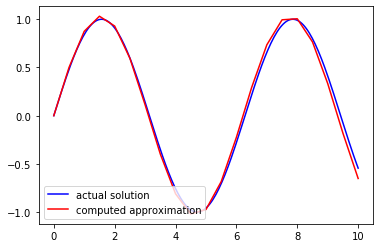

In [10]:
T = 10
N = 20
x = np.linspace(0,10,200)
sol, = plt.plot(x, np.sin(x), "b", label="actual solution")
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
approx, = plt.plot(t, u, "r", label="computed approximation")
legend = plt.legend(handles=[sol,approx], loc='lower left')
plt.show()

For larger values of $N$, it works even better:

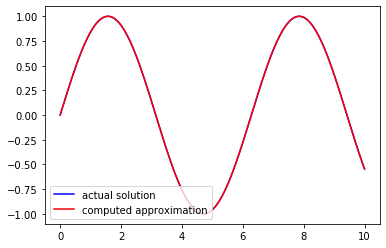

In [11]:
T = 10
N = 100
x = np.linspace(0,10,200)
sol, = plt.plot(x, np.sin(x), "b", label="actual solution")
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:0, 0, 1, T, N)
approx, = plt.plot(t, u, "r", label="computed approximation")
legend = plt.legend(handles=[sol,approx], loc='lower left')
plt.show()

### Example 2

Here is a plot with some damping:

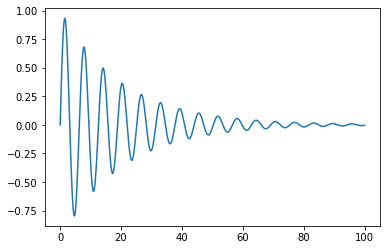

In [12]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.1, 1, lambda t:0, 0, 1, T, N)
plt.plot(t, u)
plt.show()

### Example 3

Here are some plots with some periodic forcing:

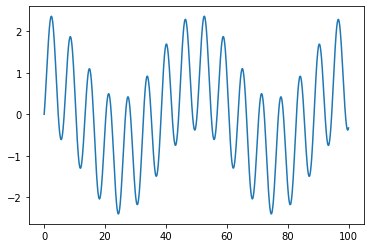

In [13]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:np.cos(t/8), 0, 1, T, N)
plt.plot(t, u)
plt.show()

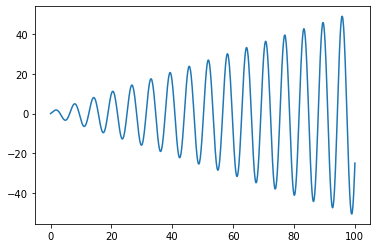

In [14]:
T = 100
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0, 1, lambda t:np.cos(t), 0, 1, T, N)
plt.plot(t, u)
plt.show()

### Example 4

Some plots with both periodic forcing and some damping:

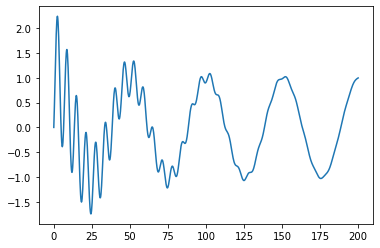

In [15]:
T = 200
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.05, 1, lambda t:np.cos(t/8), 0, 1, T, N)
plt.plot(t, u)
plt.show()

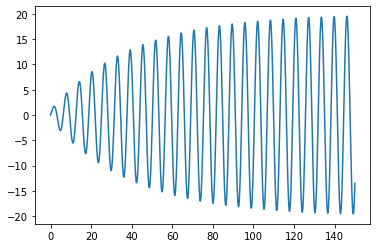

In [16]:
T = 150
N = 1000
t = np.linspace(0, T, N+1)
u = spring_solve(1, 0.05, 1, lambda t:np.cos(t), 0, 1, T, N)
plt.plot(t, u)
plt.show()